# Alcohol Effects on Study

### This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details). Dataset Available at: __[Kaggle Dataset](https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study)__

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [2]:
PortugueseDS = pd.read_csv('.\Portuguese.csv')
MathDS = pd.read_csv('.\Maths.csv')

## Peering into Portuguese Dataset

In [3]:
PortugueseDS.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
PortugueseDS.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Peering into Maths Dataset

In [5]:
MathDS.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
MathDS.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Which questions to do to the data? 


In [7]:
# Creating a column of grade average
MathDS['GradeAverage'] = round((MathDS['G1']+MathDS['G2']+MathDS['G3'])/3)
PortugueseDS['GradeAverage'] = round((PortugueseDS['G1']+PortugueseDS['G2']+PortugueseDS['G3'])/3)

#### 1. Does the absences number interfere with the grades? 

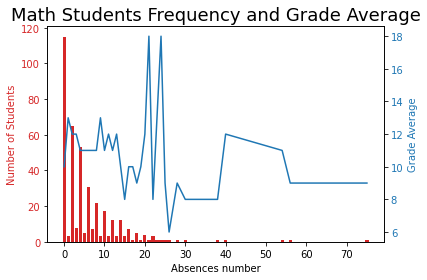

In [8]:
number_of_math_absences = MathDS['absences'].sort_values().unique()

absences_m = []
for i in number_of_math_absences:
    ct = MathDS[MathDS.absences==i]['GradeAverage'].count()
    avg = round(MathDS[MathDS.absences==i]['GradeAverage'].mean())
    tempvec = [i, ct, avg]
    absences_m.append(tempvec)
    
absences_m = pd.DataFrame(absences_m)
absences_m.columns = ['absence','count','gradeaverage']
absences_m.reset_index(drop=True)

x = absences_m['absence']
y1 = absences_m['count']
y2 = absences_m['gradeaverage']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Absences number')
ax1.set_ylabel('Number of Students', color=color)
ax1.bar(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Grade Average', color=color) 
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_title('Math Students Frequency and Grade Average', fontsize=18)

fig.tight_layout()  
plt.show()

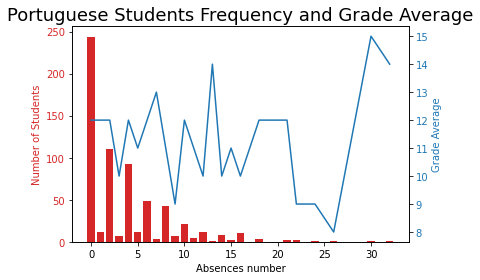

In [9]:
number_of_portuguese_absences = PortugueseDS['absences'].sort_values().unique()

absences_p = []
for i in number_of_portuguese_absences:
    ct = PortugueseDS[PortugueseDS.absences==i]['GradeAverage'].count()
    avg = round(PortugueseDS[PortugueseDS.absences==i]['GradeAverage'].mean())
    tempvec = [i, ct, avg]
    absences_p.append(tempvec)
    
absences_p = pd.DataFrame(absences_p)
absences_p.columns = ['absence','count','gradeaverage']
absences_p.reset_index(drop=True)

x1 = absences_p['absence']
y3 = absences_p['count']
y4 = absences_p['gradeaverage']


fig1, ax3 = plt.subplots()

color = 'tab:red'
ax3.set_xlabel('Absences number')
ax3.set_ylabel('Number of Students', color=color)
ax3.bar(x1, y3, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()

color = 'tab:blue'
ax4.set_ylabel('Grade Average', color=color) 
ax4.plot(x1, y4, color=color)
ax4.tick_params(axis='y', labelcolor=color)

ax3.set_title('Portuguese Students Frequency and Grade Average', fontsize=18)

fig1.tight_layout()  
plt.show()

R: Visually, portuguese students that have high frequency trend be stable at average, while when increasing the absences, the grade average graph starts to become caotic and not conclusive. On math students, even with high frequencies, they trend to be above in grade average. 

#### 2. The alcohol ingestion is harmful to the grades?

In [10]:
m_week_alc = MathDS['Walc'].sort_values().unique()
p_week_alc = PortugueseDS['Walc'].sort_values().unique()

In [11]:
math_walc_gradavg = []
for i in m_week_alc:
    avg = round(MathDS[MathDS.Walc == i]['GradeAverage'].mean())
    walc_avg = [i, avg]
    math_walc_gradavg.append(walc_avg)

math_walc_gradavg = pd.DataFrame(math_walc_gradavg, columns=['walc', 'gradeaverage'])

portuguese_walc_gradavg = []
for i in p_week_alc:
    avg = round(PortugueseDS[PortugueseDS.Walc == i]['GradeAverage'].mean())
    walc_avg = [i, avg]
    portuguese_walc_gradavg.append(walc_avg)
    
portuguese_walc_gradavg = pd.DataFrame(portuguese_walc_gradavg, columns=['walc', 'gradeaverage'])

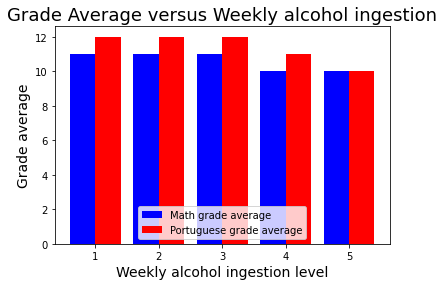

In [12]:
x = portuguese_walc_gradavg['walc']
ym = math_walc_gradavg['gradeaverage']
yp = portuguese_walc_gradavg['gradeaverage']

plt.bar(x-0.2, ym, 0.4, color='blue', label='Math grade average')
plt.bar(x+0.2, yp, 0.4, color='red', label='Portuguese grade average')
plt.title('Grade Average versus Weekly alcohol ingestion', fontsize=18)
plt.xlabel('Weekly alcohol ingestion level',fontsize=14)
plt.ylabel('Grade average',fontsize=14)
plt.legend(loc='lower center')

R: What can be confirmed is: mainly in Math's course, the group with high alcohol consumption trend to present lower averages analysing all the group. 

#### 3. Does studying more hours impact on the grades?

In [13]:
m_study_hours = MathDS['studytime'].sort_values().unique()
p_study_hours = PortugueseDS['studytime'].sort_values().unique()

In [14]:
math_studytime_gradavg = []
for i in m_study_hours:
    avg = round(MathDS[MathDS.studytime == i]['GradeAverage'].mean())
    studytime_avg = [i, avg]
    math_studytime_gradavg.append(studytime_avg)

math_studytime_gradavg = pd.DataFrame(math_studytime_gradavg, columns=['studytime', 'gradeaverage'])

portuguese_studytime_gradavg = []
for i in p_study_hours:
    avg = round(PortugueseDS[PortugueseDS.studytime == i]['GradeAverage'].mean())
    studytime_avg = [i, avg]
    portuguese_studytime_gradavg.append(studytime_avg)
    
portuguese_studytime_gradavg = pd.DataFrame(portuguese_studytime_gradavg, columns=['studytime', 'gradeaverage'])

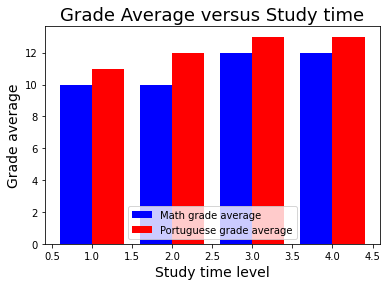

In [15]:
x = math_studytime_gradavg['studytime']
ym = math_studytime_gradavg['gradeaverage']
yp = portuguese_studytime_gradavg['gradeaverage']

plt.bar(x-0.2, ym, 0.4, color='blue', label='Math grade average')
plt.bar(x+0.2, yp, 0.4, color='red', label='Portuguese grade average')
plt.title('Grade Average versus Study time', fontsize=18)
plt.xlabel('Study time level',fontsize=14)
plt.ylabel('Grade average',fontsize=14)
plt.legend(loc='lower center')
plt.show()

R: According to what is showm, the average of those who study more hours trend to be higher than the others.

#### 4. There is any correlation between the Failures and the alcohol consumpion?

In [16]:
m_failures = MathDS['failures'].sort_values().unique()
p_failures = PortugueseDS['failures'].sort_values().unique()
m_week_alc = MathDS['Walc'].sort_values().unique()
p_week_alc = PortugueseDS['Walc'].sort_values().unique()

In [17]:
math_failures_gradavg = []
portuguese_failures_gradavg = []
for i in m_failures:
    math_ftemp= []
    portuguese_ftemp = []
    for j in m_week_alc:
        lm_temp = len(MathDS[(MathDS.failures == i)&(MathDS.Walc == j)])
        lp_temp = len(PortugueseDS[(PortugueseDS.failures == i)&(PortugueseDS.Walc == j)])
        if np.isnan(lm_temp):
            lm_temp = 0 
        if np.isnan(lp_temp):
            lp_temp = 0
        math_ftemp.append(lm_temp)
        portuguese_ftemp.append(lp_temp)
    math_failures_gradavg.append(math_ftemp)
    portuguese_failures_gradavg.append(portuguese_ftemp)
    
math_failures_gradavg = np.array(math_failures_gradavg).T
portuguese_failures_gradavg = np.array(portuguese_failures_gradavg).T

math_failures_gradavg = np.array_split(math_failures_gradavg, 5)
portuguese_failures_gradavg = np.array_split(portuguese_failures_gradavg, 5)

for i, v in enumerate(portuguese_failures_gradavg):
    portuguese_failures_gradavg[i] = portuguese_failures_gradavg[i][0]
    math_failures_gradavg[i] = math_failures_gradavg[i][0]

In [18]:
labels = ['0 Failures', '1 Failures', '2 Failures', '3 Failures']

In [19]:
def gen_graph(values, groups, name):
    n = len(values)                # Number of bars to plot
    w = .15                        # With of each column
    x = np.arange(0, len(groups))   # Center position of group on x axis

    for i, value in enumerate(values):
        position = x + (w*(1-n)/2) + i*w
        plt.bar(position, value, width=w, label=f'Level {i+1}')

    plt.xticks(x, groups);
    plt.title(f'Number of students versus {name}', fontsize=18)
    plt.ylabel('Students')
    plt.xlabel(f'{name} grouped by alcohol consumption')

    plt.legend()
    plt.show()

In [21]:
math_failures_gradavg

[array([127,  15,   4,   5]),
 array([67, 12,  4,  2]),
 array([63, 10,  4,  3]),
 array([37,  9,  4,  1]),
 array([18,  4,  1,  5])]

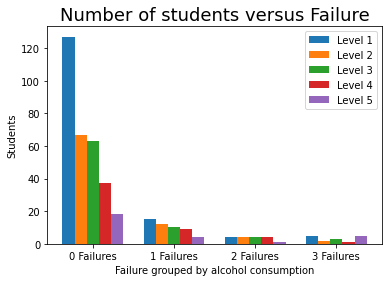

In [20]:
gen_graph(values=math_failures_gradavg, groups=labels, name='Failure')

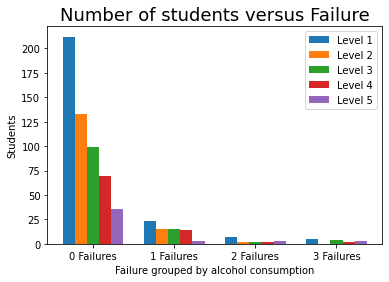

In [21]:
gen_graph(values=portuguese_failures_gradavg, groups=labels, name='Failure')

R: Looking to the results, it seems to present no correlation in alcohol consumption and failures, once there is a diversity in the group with 0 failures. 

#### 5. The alcohol consumption is higher in people with relationship ?

In [22]:
m_romantic = MathDS['romantic'].sort_values().unique()
p_romantic = PortugueseDS['romantic'].sort_values().unique()
m_week_alc = MathDS['Walc'].sort_values().unique()
p_week_alc = PortugueseDS['Walc'].sort_values().unique()

In [23]:
math_romantic_gradavg = []
portuguese_romantic_gradavg = []
for i in m_romantic:
    math_ftemp= []
    portuguese_ftemp = []
    for j in m_week_alc:
        lm_temp = len(MathDS[(MathDS.romantic == i)&(MathDS.Walc == j)])
        lp_temp = len(PortugueseDS[(PortugueseDS.romantic == i)&(PortugueseDS.Walc == j)])
        if np.isnan(lm_temp):
            lm_temp = 0 
        if np.isnan(lp_temp):
            lp_temp = 0
        math_ftemp.append(lm_temp)
        portuguese_ftemp.append(lp_temp)
    math_romantic_gradavg.append(math_ftemp)
    portuguese_romantic_gradavg.append(portuguese_ftemp)

math_romantic_gradavg = np.array(math_romantic_gradavg).T
portuguese_romantic_gradavg = np.array(portuguese_romantic_gradavg).T

math_romantic_gradavg = np.array_split(math_romantic_gradavg, 5)
portuguese_romantic_gradavg = np.array_split(portuguese_romantic_gradavg, 5)

for i, v in enumerate(math_romantic_gradavg):
    portuguese_romantic_gradavg[i] = portuguese_romantic_gradavg[i][0]
    math_romantic_gradavg[i] = math_romantic_gradavg[i][0]

In [24]:
labels1 = ['no', 'yes']

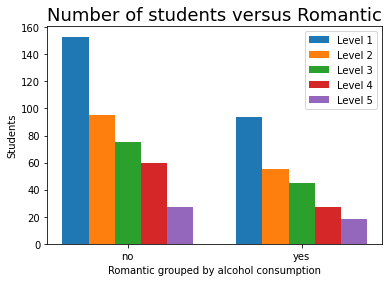

In [25]:
gen_graph(values=portuguese_romantic_gradavg, groups=labels1, name='Romantic')

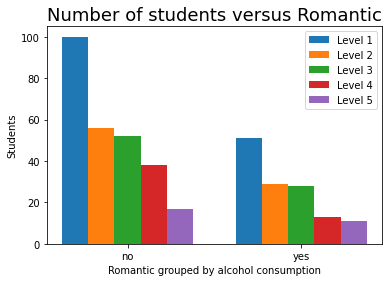

In [26]:
gen_graph(values=math_romantic_gradavg, groups=labels1, name='Romantic')

R: It is observed that people's alcohol consumption in a relationship is lower than those who are single.

#### 6. Does the family relation affects the alcohol ingestion?

In [27]:
m_famsup = MathDS['famsup'].sort_values().unique()
p_famsup = PortugueseDS['famsup'].sort_values().unique()
m_week_alc = MathDS['Walc'].sort_values().unique()
p_week_alc = PortugueseDS['Walc'].sort_values().unique()

In [28]:
math_famsup_gradavg = []
portuguese_famsup_gradavg = []
for i in m_famsup:
    math_ftemp= []
    portuguese_ftemp = []
    for j in m_week_alc:
        lm_temp = len(MathDS[(MathDS.famsup == i)&(MathDS.Walc == j)])
        lp_temp = len(PortugueseDS[(PortugueseDS.famsup == i)&(PortugueseDS.Walc == j)])
        if np.isnan(lm_temp):
            lm_temp = 0 
        if np.isnan(lp_temp):
            lp_temp = 0
            
        math_ftemp.append(lm_temp)
        portuguese_ftemp.append(lp_temp)
    math_famsup_gradavg.append(math_ftemp)
    portuguese_famsup_gradavg.append(portuguese_ftemp)

math_famsup_gradavg = np.array(math_famsup_gradavg).T
portuguese_famsup_gradavg = np.array(portuguese_famsup_gradavg).T

math_famsup_gradavg = np.array_split(math_famsup_gradavg, 5)
portuguese_famsup_gradavg = np.array_split(portuguese_famsup_gradavg, 5)

for i, v in enumerate(math_famsup_gradavg):
    math_famsup_gradavg[i] = math_famsup_gradavg[i][0]
    portuguese_famsup_gradavg[i] = portuguese_famsup_gradavg[i][0]

In [29]:
labels2 = ['no', 'yes']

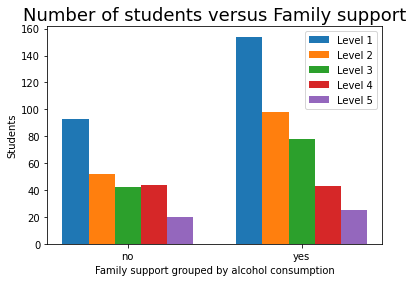

In [30]:
gen_graph(values=portuguese_famsup_gradavg, groups=labels1, name='Family support')

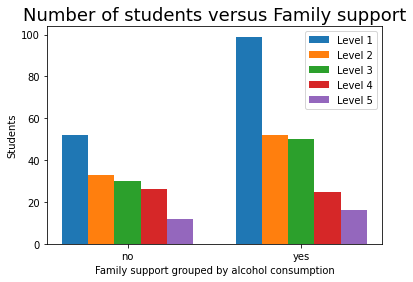

In [31]:
gen_graph(values=math_famsup_gradavg, groups=labels1, name='Family support')

R: People that has lower family suport presents lower alcohol consumption considenring the others. 

#### 7. Does the age influences on alcohol consumption?

In [32]:
m_age = MathDS['age'].sort_values().unique()
p_age = PortugueseDS['age'].sort_values().unique()
m_week_alc = MathDS['Walc'].sort_values().unique()
p_week_alc = PortugueseDS['Walc'].sort_values().unique()

In [41]:
math_age_gradavg = []
portuguese_age_gradavg = []
for i in m_age:
    math_ftemp= []
    portuguese_ftemp = []
    for j in m_week_alc:
        lm_temp = len(MathDS[(MathDS.age == i)&(MathDS.Walc == j)])
        lp_temp = len(PortugueseDS[(PortugueseDS.age == i)&(PortugueseDS.Walc == j)])
        if np.isnan(lm_temp):
            lm_temp = 0 
        if np.isnan(lp_temp):
            lp_temp = 0
            
        math_ftemp.append(lm_temp)
        portuguese_ftemp.append(lp_temp)
    math_age_gradavg.append(math_ftemp)
    portuguese_age_gradavg.append(portuguese_ftemp)

math_age_gradavg = np.array(math_age_gradavg).T
portuguese_age_gradavg = np.array(portuguese_age_gradavg).T

math_age_gradavg = np.array_split(math_age_gradavg, 5)
portuguese_age_gradavg = np.array_split(portuguese_age_gradavg, 5)

for i, v in enumerate(math_age_gradavg):
    math_age_gradavg[i] = math_age_gradavg[i][0]
    portuguese_age_gradavg[i] = portuguese_age_gradavg[i][0]

In [42]:
labels3= ['15', '16', '17', '18', '19', '20', '21', '22']

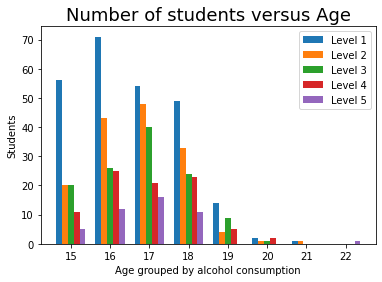

In [43]:
gen_graph(values=portuguese_age_gradavg, groups=labels3, name='Age')

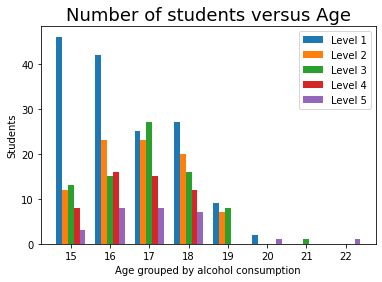

In [44]:
gen_graph(values=math_age_gradavg, groups=labels3, name='Age')

R: Yes, as younger a student is as high is its alcohol consumtion. When become older, the alcohol consumption trend to decrease.

#### 8. Does the gender influences in alcohol consumption?

In [45]:
m_sex = MathDS['sex'].sort_values().unique()
p_sex = PortugueseDS['sex'].sort_values().unique()
m_week_alc = MathDS['Walc'].sort_values().unique()
p_week_alc = PortugueseDS['Walc'].sort_values().unique()

In [46]:
math_sex_gradavg = []
portuguese_sex_gradavg = []
for i in m_sex:
    math_ftemp= []
    portuguese_ftemp = []
    for j in m_week_alc:
        lm_temp = len(MathDS[(MathDS.sex == i)&(MathDS.Walc == j)])
        lp_temp = len(PortugueseDS[(PortugueseDS.sex == i)&(PortugueseDS.Walc == j)])
        if np.isnan(lm_temp):
            lm_temp = 0 
        if np.isnan(lp_temp):
            lp_temp = 0
            
        math_ftemp.append(lm_temp)
        portuguese_ftemp.append(lp_temp)
    math_sex_gradavg.append(math_ftemp)
    portuguese_sex_gradavg.append(portuguese_ftemp)

math_sex_gradavg = np.array(math_sex_gradavg).T
portuguese_sex_gradavg = np.array(portuguese_sex_gradavg).T

math_sex_gradavg = np.array_split(math_sex_gradavg, 5)
portuguese_sex_gradavg = np.array_split(portuguese_sex_gradavg, 5)

for i, v in enumerate(portuguese_sex_gradavg):
    math_sex_gradavg[i] = math_sex_gradavg[i][0]
    portuguese_sex_gradavg[i] = portuguese_sex_gradavg[i][0]

In [47]:
labels4= ['F', 'M']

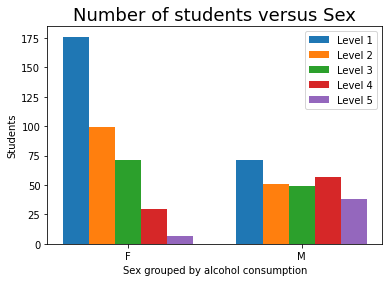

In [48]:
gen_graph(values=portuguese_sex_gradavg, groups=labels4, name='Sex')

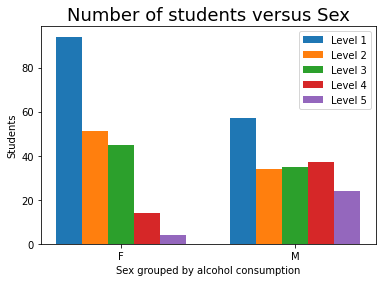

In [49]:
gen_graph(values=math_sex_gradavg, groups=labels4, name='Sex')

R: Male students trend to present a high and very high consumption of alcohol while female presents, very low or moderate consumption.

### Which information does the data bring? Is it possible to take decision on obtained information?

&emsp;The data bring information about students in two courses, Portuguese and Math, 
as it is shown in the begining of this notebook. In this dataset, there is a lot 
of features about the students as: age, weekly alcohol consumption, grades in 
three semesters, and so on.<br>
 &emsp;To take decision based on the data, first it is necessary to know where and how 
does the data was taken, if present biases when collecting samples and how was the 
method performed to avoid those problems.<br>
Once it is taken, the dataset is cleaned, formatted and then is ready to start 
receiving questions about the data. Using the correct statistic methods it is 
possible to get insights and improve some process or to pay attention at correlations,
this can be use to save money and increase the performance of a system.</p>